<a href="https://colab.research.google.com/github/sujan9945587042/Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df[df.duplicated]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


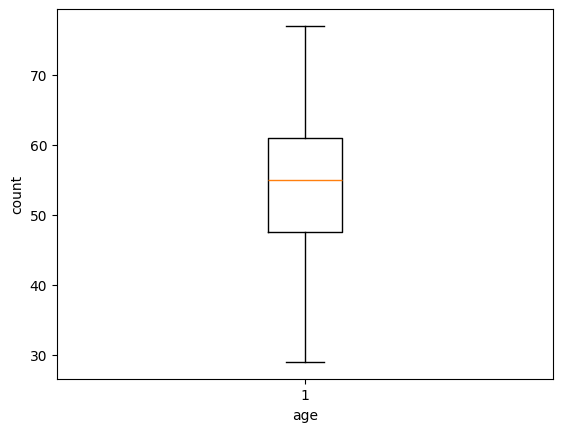

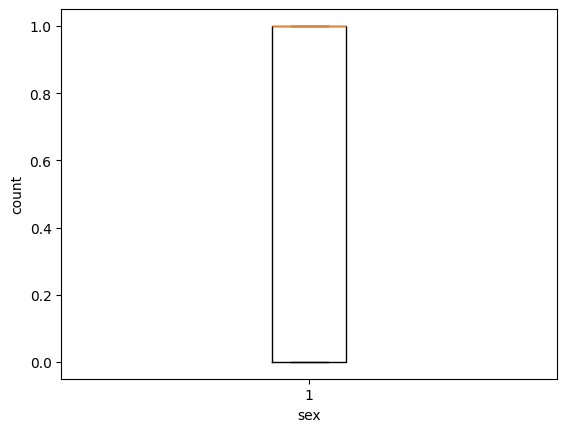

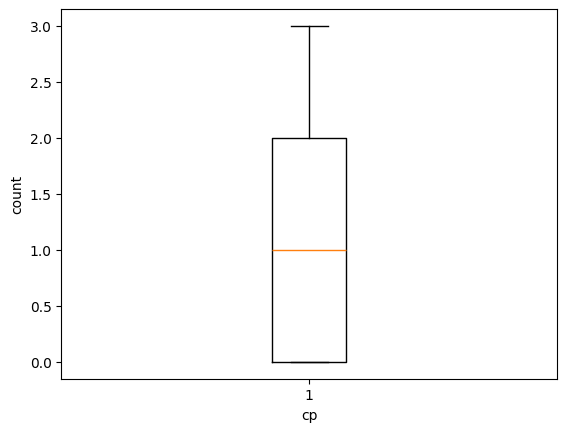

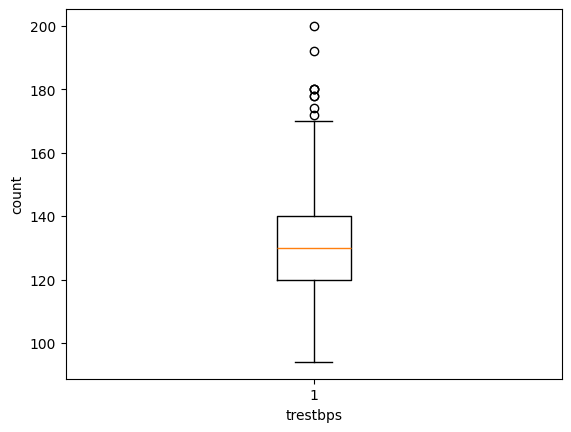

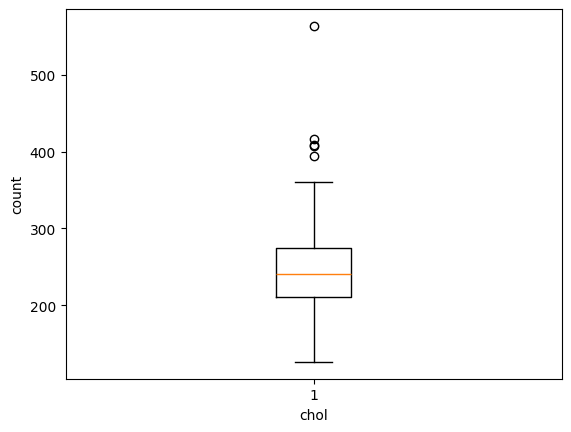

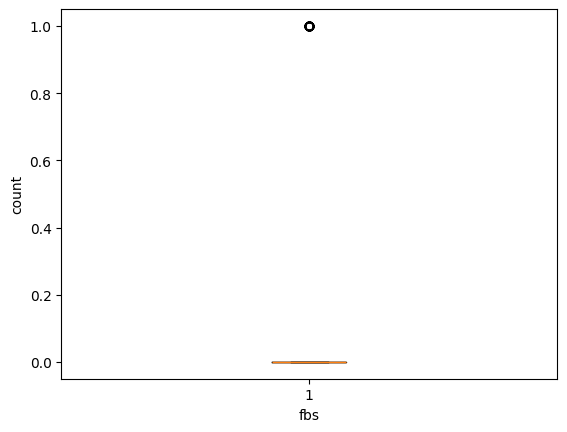

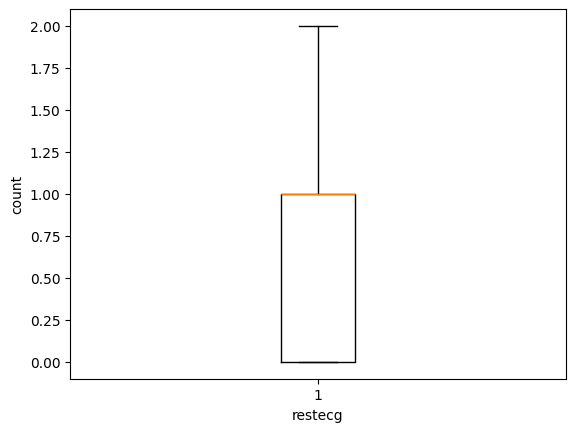

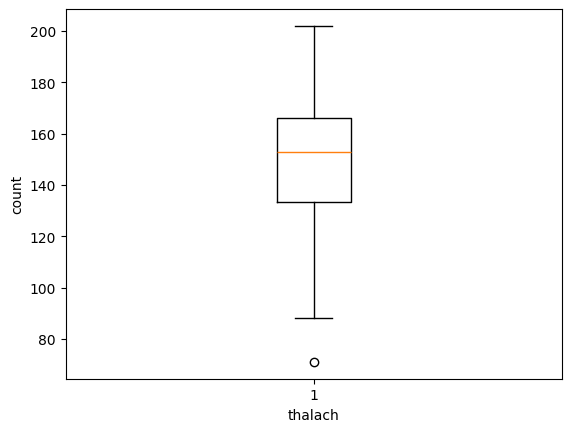

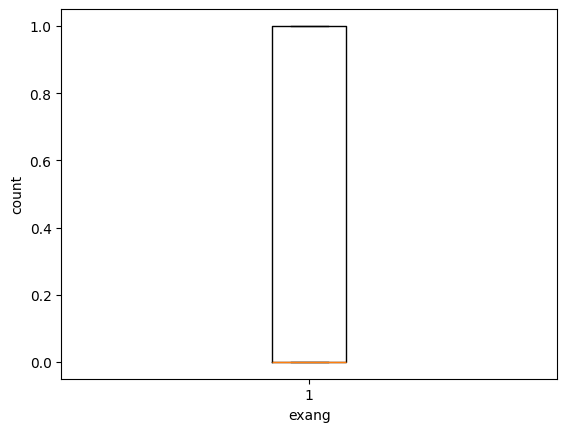

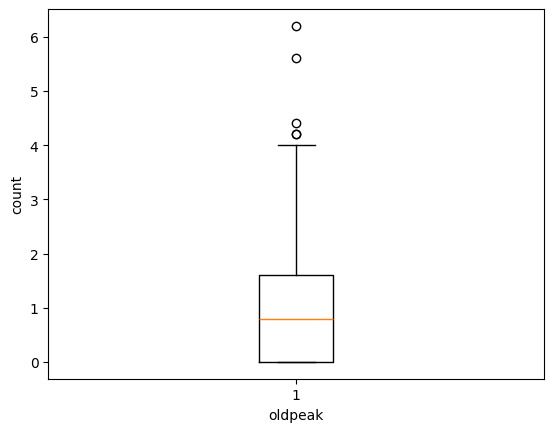

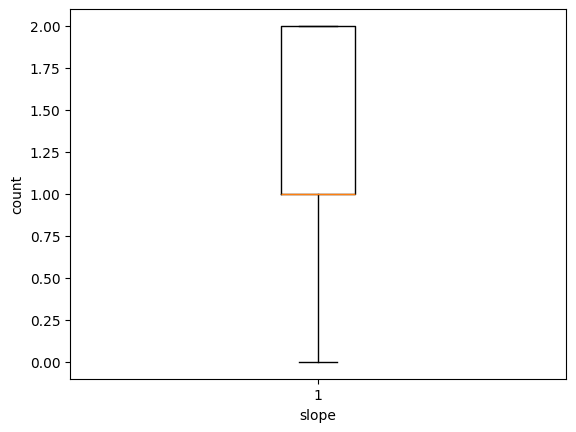

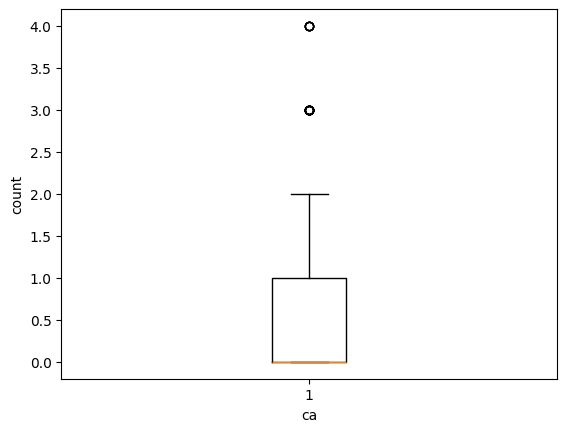

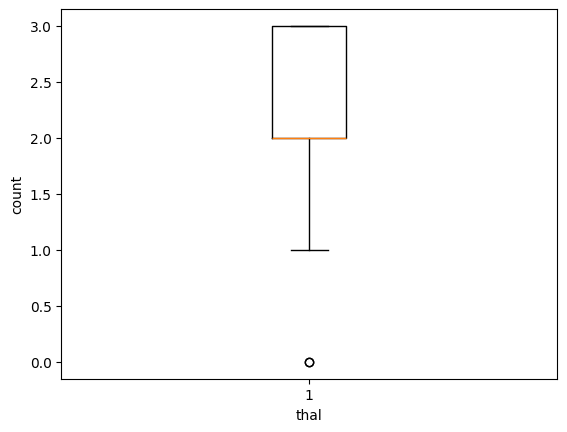

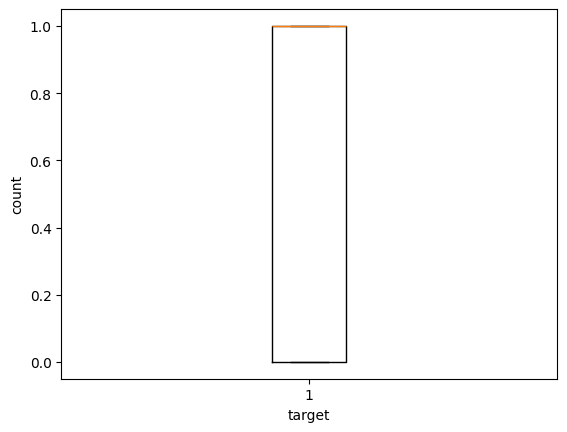

In [ ]:
for x in df.columns:
  if df[x].dtypes=='object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.ylabel("count")
  plt.show()

In [ ]:
outliers={'trestbps','chol','oldpeak','ca'}
for x in outliers:
  Q1=df[x].quantile(0.25)
  Q3=df[x].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df=df[(df[x]>=lower_bound) & (df[x]<=upper_bound)]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X=df.drop('target',axis=1)

In [ ]:
Y=df['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=40)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3


In [ ]:
y_train

,target
268,0
5,1
35,1
166,0
298,0
...,...
124,1
212,0
179,0
7,1


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3


In [ ]:
df_classifier=DecisionTreeClassifier(max_depth=5)

In [ ]:
df_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:

y_predicted=df_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(y_predicted,y_test)

In [ ]:
accuracy*100

79.24528301886792

In [ ]:
y_pred=df_classifier.predict(x_train)

In [ ]:
accuracy_score(y_train,y_pred)

0.943127962085308

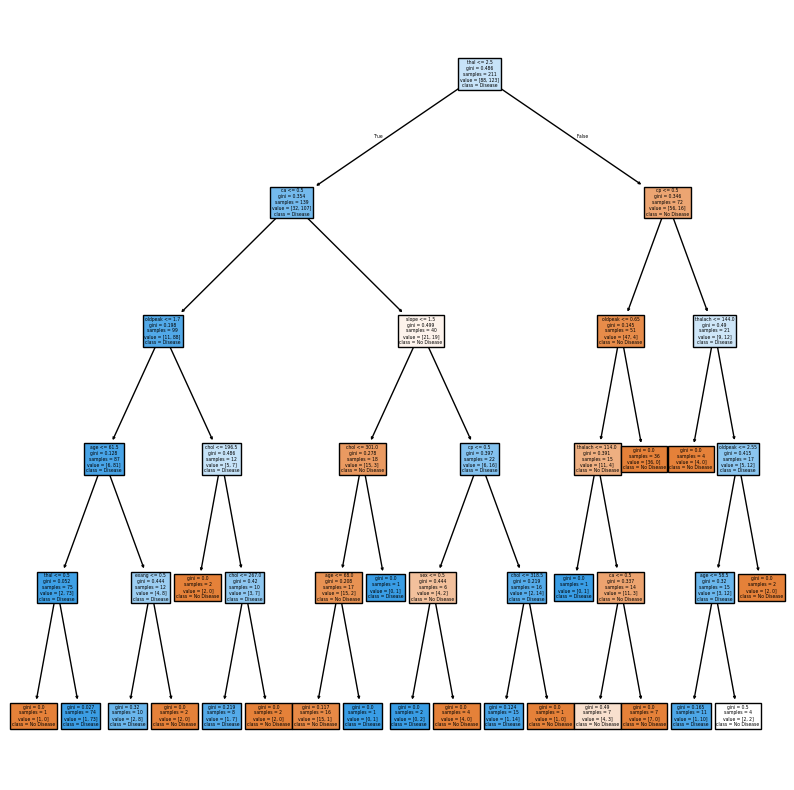

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
tree.plot_tree(df_classifier, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()

In [ ]:
print(f"The depth of the decision tree is: {df_classifier.tree_.max_depth}")

The depth of the decision tree is: 8
